<a href="https://colab.research.google.com/github/Sujal3013/Iris-Species-Prediction-Model/blob/main/Iris_prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [6]:
#IRIS.csv contains clean data
irisdf=pd.read_csv('IRIS.csv')

In [64]:
#IRIS1.csv contains data which needs preprocessing for further use.
iris1df=pd.read_csv('IRIS1.csv')

In [8]:
# head() gives you first 5 rows of data set
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris1df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,NaN,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,NaN
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# tail() gives you last 5 row of dataset
irisdf.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
iris1df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,NaN,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,NaN
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,NaN,1.8,Iris-virginica


**Shape of Data**

In [12]:
#shape
irisdf.shape

(150, 5)

In [13]:
iris1df.shape

(150, 5)

# Statistical Analysis

In [14]:
#describe
irisdf.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
iris1df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,140.000000,142.000000,137.000000,143.000000
mean,5.833571,3.061268,3.713139,1.184615
std,0.841086,0.450035,1.791845,0.766031
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.800000,6.900000,2.500000


In [16]:
#info()
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
iris1df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  140 non-null    float64
 1   sepal_width   142 non-null    float64
 2   petal_length  137 non-null    float64
 3   petal_width   143 non-null    float64
 4   species       137 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data Cleaning

Most crucial part of EDA

**1. Handling Duplicate Values**

In [18]:
#duplicated
iris1df.duplicated().sum()

2

In [19]:
#keep
duplicate=iris1df[iris1df.duplicated(keep='first')]
duplicate

,sepal_length,sepal_width,petal_length,petal_width,species
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


**Removing Duplicate values**

In [20]:

iris1df.drop_duplicates(inplace=True)

In [21]:
#shape after dropping duplicates
irisdf.shape

(150, 5)

In [22]:
iris1df.shape

(148, 5)

# Handling Missing Values

In [23]:
#isnull
irisdf.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [24]:
iris1df.isnull().sum()

sepal_length    10
sepal_width      8
petal_length    13
petal_width      7
species         13
dtype: int64

**FILLING MISSING VALUES**

In [25]:
#mean for sepal length
mean=iris1df['sepal_length'].mean()
mean

5.840579710144928

In [26]:
# fillna for sepal length using mean
iris1df['sepal_length'].fillna(value=mean,inplace=True)
iris1df.isnull().sum()

sepal_length     0
sepal_width      8
petal_length    13
petal_width      7
species         13
dtype: int64

In [27]:
#mode for sepal width
mode=iris1df['sepal_width'].mode()
mode

0    3.0
dtype: float64

*2 Modes can be possible for dataset*

In [28]:
#fillna for sepal width using mode
iris1df['sepal_width'].fillna(value=mode[0],inplace=True)
iris1df.isnull().sum()

sepal_length     0
sepal_width      0
petal_length    13
petal_width      7
species         13
dtype: int64

In [29]:
#median for petal length
median=iris1df['petal_length'].median()
median

4.2

In [30]:
#fillna for petal length using median
iris1df['petal_length'].fillna(value=median,inplace=True)
iris1df.isnull().sum()

sepal_length     0
sepal_width      0
petal_length     0
petal_width      7
species         13
dtype: int64

In [31]:
#fillna for petal width using a constant value
iris1df['petal_width'].fillna(value=0.1,inplace=True)
iris1df.isnull().sum()

sepal_length     0
sepal_width      0
petal_length     0
petal_width      0
species         13
dtype: int64

*For Species Column we cannot assign values as it will various strings and statistics doesn't work at them.*

In [32]:
#dropna
iris1df=iris1df.dropna(axis=0,how='any')
iris1df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [33]:
iris1df.shape

(135, 5)

In [34]:
petal_length=irisdf['petal_length']
petal_width=irisdf['petal_width']
sepal_length=irisdf['sepal_length']
sepal_width=irisdf['sepal_length']
species=irisdf['species']


# Visualizing IRIS dataset

In [35]:
#importing required libraries
import matplotlib.pyplot as plt

In [36]:
petal_length=irisdf['petal_length']
petal_width=irisdf['petal_width']
sepal_length=irisdf['sepal_length']
sepal_width=irisdf['sepal_width']

Text(0, 0.5, 'petal_width')

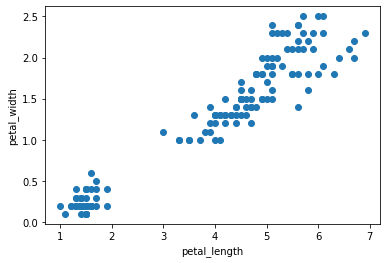

In [37]:
plt.scatter(x=petal_length,y=petal_width)
plt.xlabel('petal_length')
plt.ylabel('petal_width')

In [38]:
setosa=irisdf[irisdf['species']=='Iris-setosa']
setosa

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [39]:
versicolor=irisdf[irisdf['species']=='Iris-versicolor']
versicolor

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor


In [40]:
virginica=irisdf[irisdf['species']=='Iris-virginica']
virginica

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica


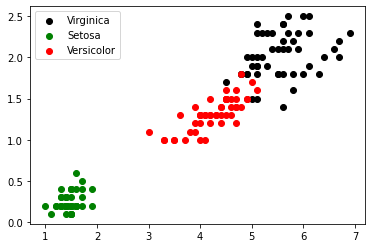

In [41]:
plt.scatter(virginica['petal_length'],virginica['petal_width'],color='k',label='Virginica')
plt.scatter(setosa['petal_length'],setosa['petal_width'],color='g',label='Setosa')
plt.scatter(versicolor['petal_length'],versicolor['petal_width'],color='r',label='Versicolor')
plt.legend()

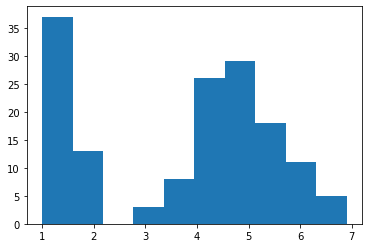

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <a list of 10 Patch objects>)

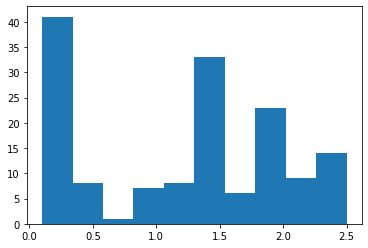

In [42]:
plt.hist(irisdf['petal_length'])
plt.show()
plt.hist(irisdf['petal_width'])

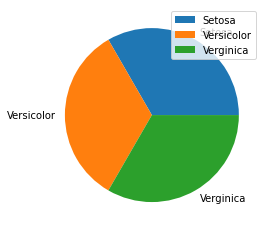

In [43]:
plt.pie(irisdf['species'].value_counts(),labels=['Setosa','Versicolor','Verginica'])
plt.legend()

# Data Modelling Using sklearn

In [45]:
data=pd.read_csv('IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [48]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [50]:
x=data.iloc[:,:4]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
y=data.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

**Standardizing Dataset using StandardScaler**

In [52]:
scaler=StandardScaler()

In [53]:
x=scaler.fit_transform(x)
x[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

**Splitting the Dataset into Training and Testing set**

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Training our Model

In [55]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

**Getting the predictions using model**

In [56]:
pred=model.predict(x_test)
pred[0:20]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [57]:
y_test[0:20]

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
Name: species, dtype: object

**Getting Accuracy score of Model**

In [58]:
accuracy=accuracy_score(y_test,pred)
accuracy

0.9666666666666667

In [59]:
cm=confusion_matrix(y_test,pred)
cm

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [60]:
Result=pd.DataFrame(data=[y_test.values,pred],index=['y_test','pred'])
Result.transpose()

,y_test,pred
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-setosa,Iris-setosa
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-virginica
9,Iris-versicolor,Iris-versicolor


In [61]:
correct_sum=[]
for i in range(1,20):
    model=KNeighborsClassifier(n_neighbors=1)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    correct=np.sum(pred==y_test)
    correct_sum.append(correct)
correct_sum    

[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29]

In [62]:
Result=pd.DataFrame(data=correct_sum)
Result.index=Result.index+1
Result.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
